# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

## Packages and Importing Data

In [1]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [2]:
# importing data
data_utilitarian_filter = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_filter.csv')

data_utilitarian_razor = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_razor.csv')

data_utilitarian_mouse = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_mouse.csv')

data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_hedonic_total.csv')

In [ ]:
data_frames = [data_utilitarian_razor, data_utilitarian_filter, data_utilitarian_mouse,data_hedonic]

# Iterate over each DataFrame
for df in data_frames:
    # Check if 'timestamp' column exists in the DataFrame
    if 'timestamp' in df.columns:
        # Convert 'timestamp' column to datetime format
        df['timestamp'] = pd.to_datetime(df['timestamp'])

# Functions for data analysis

In [ ]:
def plot_reviews_by_year(df, title_suffix=None):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df['year'].hist(bins=len(df['year'].unique()), color='blue', alpha=0.5)
    if title_suffix:
        plt.title(f'Distribution of Reviews by Year - {title_suffix}')
    else:
        plt.title('Distribution of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.show()

In [ ]:

def plot_avg_rating_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Group by year and calculate the average rating
    avg_rating_by_year = df.groupby('year')['rating'].mean()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color='blue', marker='o', linestyle='-')
    plt.title('Average Rating of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_avg_rating_by_year(your_dataframe)


In [ ]:
# Function for showing the amount on reviews by year

def plot_rating_counts_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    df['rating_category'] = df['rating'].map(rating_categories)

    # Group by year and rating category, then count the occurrences
    rating_counts_by_year = df.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

    # Plot the stacked bar plot
    plt.figure(figsize=(10, 6))
    rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
    plt.title('Rating Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ratings')
    plt.legend(title='Rating Category', loc='upper left')
    plt.grid(True)
    plt.show()


In [ ]:
# Showing sentiment distribution by year

def plot_sentiment_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()


In [ ]:
def plot_average_rating_and_sentiment_over_time(data_frame):
    # Group the data by timestamp and calculate the average rating for each time period
    average_rating_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

    # Group the data by timestamp and calculate the average sentiment score for each time period
    average_sentiment_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['sentiment'].mean()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting average rating over time
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Average Rating', color=color)
    ax1.plot(average_rating_over_time.index, average_rating_over_time.values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Create a secondary y-axis for sentiment score
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Sentiment Score', color=color)
    ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Rating and Sentiment Over Time')
    plt.show()

# 1. Basic statistic

In [ ]:
# Quick overlook of the data
print (data_utilitarian_mouse.describe())


In [ ]:
print (data_utilitarian_filter.describe())


In [ ]:
print (data_utilitarian_razor.describe())

## Analyzing Helpfulness

In [ ]:
# Function for plotting helpfulness distribution

def plot_helpfulness_votes_over_time(data_frame):
    # Group by timestamp and calculate the sum of helpfulness votes
    votes_by_timestamp = data_frame.groupby('timestamp')['helpful_vote'].sum()

    # Filter out timestamps with less than or equal to 1 helpful vote
    votes_by_timestamp = votes_by_timestamp[votes_by_timestamp > 1]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(votes_by_timestamp.index, votes_by_timestamp, color='blue', alpha=0.5)
    plt.title('Helpfulness Votes over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Helpful Votes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [ ]:
helpful_reviews_count = data_utilitarian_mouse[data_utilitarian_mouse['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

In [ ]:
helpful_reviews_count = data_utilitarian_filter[data_utilitarian_filter['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

In [ ]:
helpful_reviews_count = data_utilitarian_razor[data_utilitarian_razor['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

In [ ]:
helpful_reviews_count = data_hedonic[data_hedonic['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

In [ ]:
# Define the categories and their total data and helpful reviews count
categories = ['Hedonic', 'Razor', 'Filter', 'Mouse']
total_data_counts = [len(data_hedonic), len(data_utilitarian_razor), len(data_utilitarian_filter), len(data_utilitarian_mouse)]
helpful_reviews_counts = [data_hedonic[data_hedonic['helpful_vote'] > 0].shape[0],
                          data_utilitarian_razor[data_utilitarian_razor['helpful_vote'] > 0].shape[0],
                          data_utilitarian_filter[data_utilitarian_filter['helpful_vote'] > 0].shape[0],
                          data_utilitarian_mouse[data_utilitarian_mouse['helpful_vote'] > 0].shape[0]]

# Create stacked bar chart
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart
bar1 = plt.bar(categories, total_data_counts, label='Total Data')
bar2 = plt.bar(categories, helpful_reviews_counts, label='Helpful Reviews')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Total Data vs Helpful Reviews per Category')
plt.legend()

# Adding values on top of the bars
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

# Display the plot
plt.show()


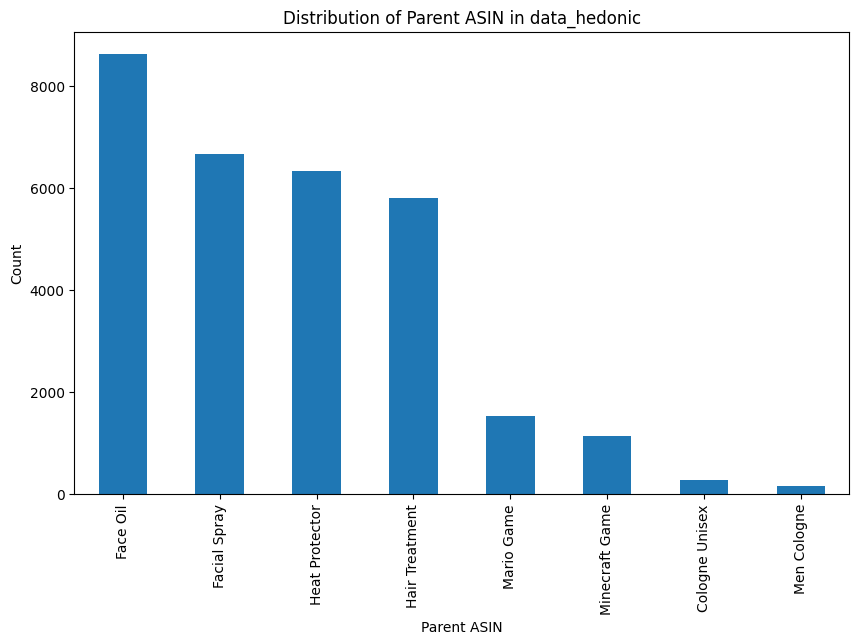

In [6]:
import matplotlib.pyplot as plt

# Calculate counts of each parent_asin
parent_asin_counts = data_hedonic['product_type'].value_counts()

# Plotting the distribution of parent_asin
plt.figure(figsize=(10, 6))
parent_asin_counts.plot(kind='bar')
plt.xlabel('Parent ASIN')
plt.ylabel('Count')
plt.title('Distribution of Parent ASIN in data_hedonic')
plt.show()


## 3. Text Analysis Wordclouds 

In [ ]:
# Generating Wordclouds

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()